Customer Segmentation

Importing Necessary Libraries:

In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Reading the csv file into Dataframe

In [2]:
df = pd.read_csv("E:\Projects ML\AL & DA Intern ASDC AI\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Renaming data columns

In [16]:
#rename data's columns
df.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'},inplace=True)

In [4]:
df.shape

(200, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data Preparation & Exploration

In [18]:
df.sample(5)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
35,36,Female,21,33,81
92,93,Male,48,60,49
140,141,Female,57,75,5
148,149,Female,34,78,22
95,96,Male,24,60,52


In [7]:
missing_values_count = df.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [10]:
#data type control
df.dtypes

CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

## Univariate analysis

Univariate analysis involves the examination and interpretation of a single variable or feature at a time. This type of analysis provides insights into the distribution, central tendency, and spread of individual variables. Univariate analysis is a fundamental step in exploratory data analysis (EDA) and is often used to understand the basic characteristics of each variable in isolation

In [20]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='AnnualIncome', ylabel='Count'>

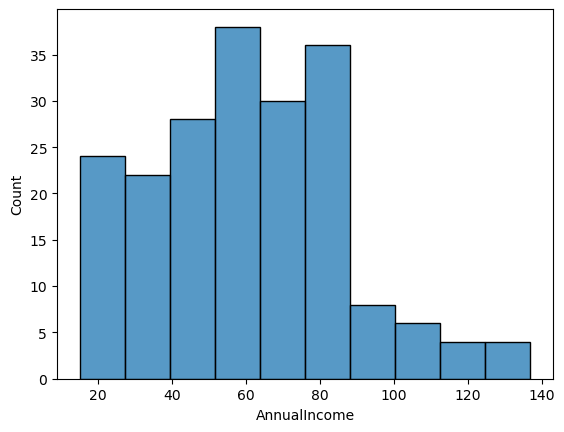

In [26]:
sns.histplot(df['AnnualIncome'])

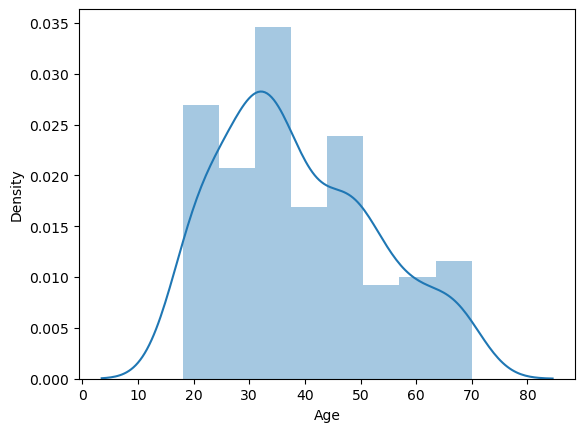

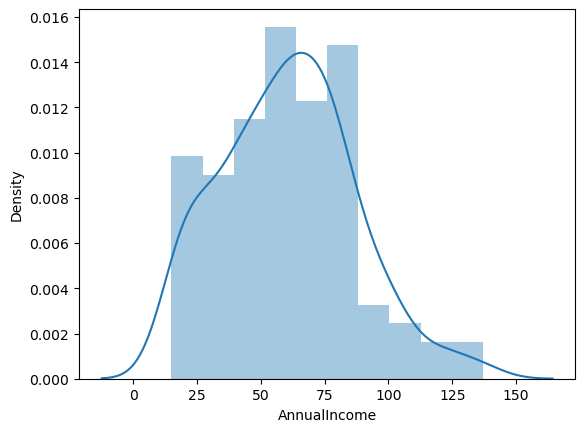

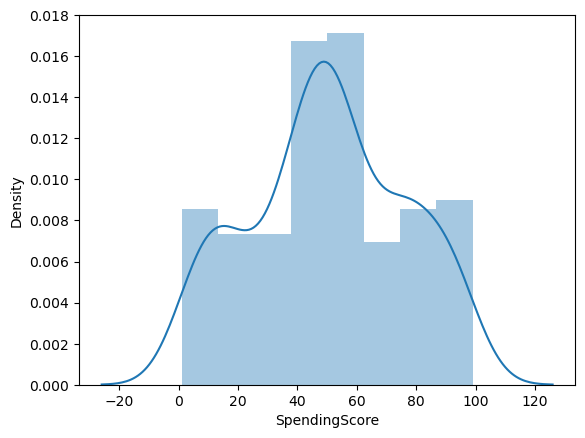

In [30]:
columns =['Age','AnnualIncome','SpendingScore']
for column in columns:
    plt.figure()
    sns.distplot(df[column])

A Kernel Density Estimate (KDE) plot is a non-parametric way to estimate the probability density function of a random variable,
It provides a smooth curve that represents the distribution of a dataset,
The KDE plot is particularly useful when you want to visualize the underlying probability distribution of a continuous variable.

<Figure size 640x480 with 0 Axes>

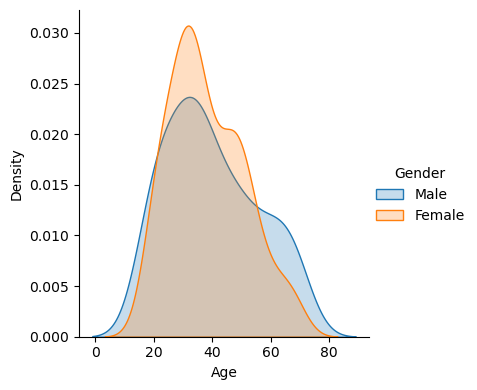

<Figure size 640x480 with 0 Axes>

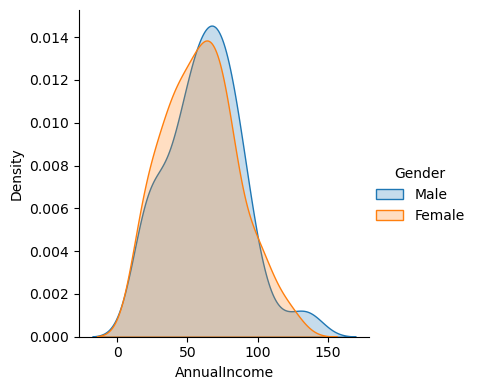

<Figure size 640x480 with 0 Axes>

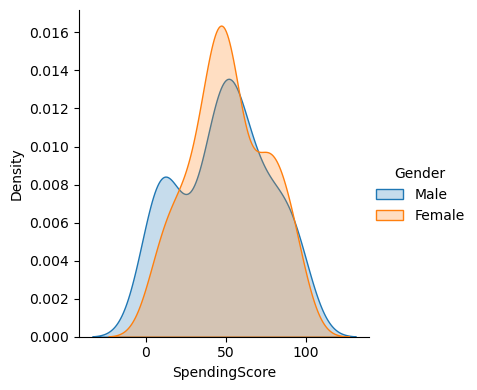

In [46]:
columns =['Age','AnnualIncome','SpendingScore']
for column in columns:
    plt.figure()
    g = sns.FacetGrid(df, hue='Gender', height=4)
    g.map(sns.kdeplot,column, shade=True)
    # Add a legend
    g.add_legend()
    # Show the plot
    plt.show()

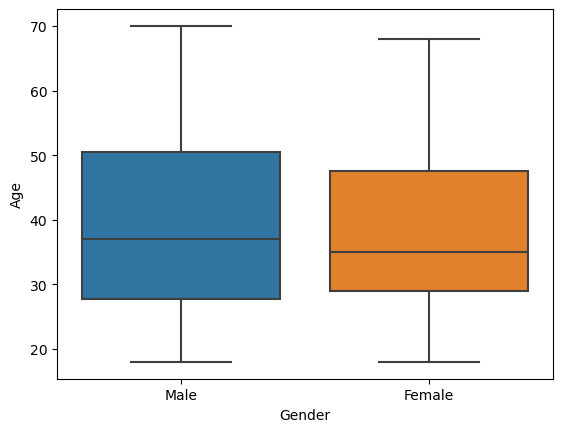

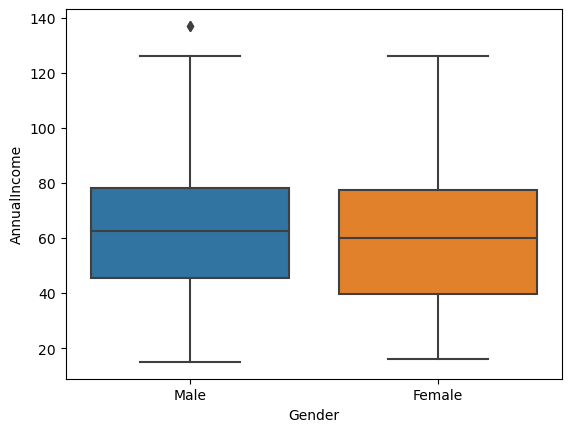

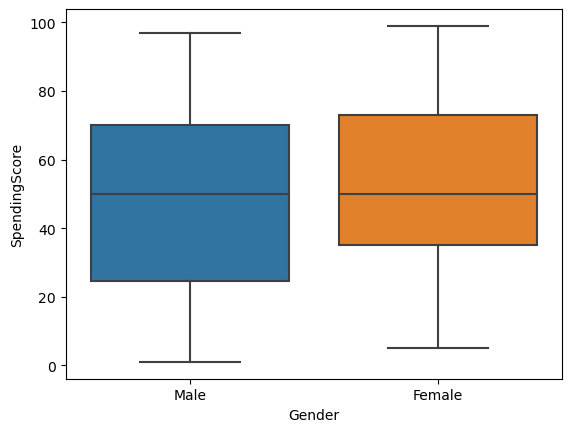

In [47]:
columns =['Age','AnnualIncome','SpendingScore']
for column in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[column])

In [58]:
gender_distribution = df['Gender'].value_counts(normalize=True) * 100
gender_distribution

Female    56.0
Male      44.0
Name: Gender, dtype: float64

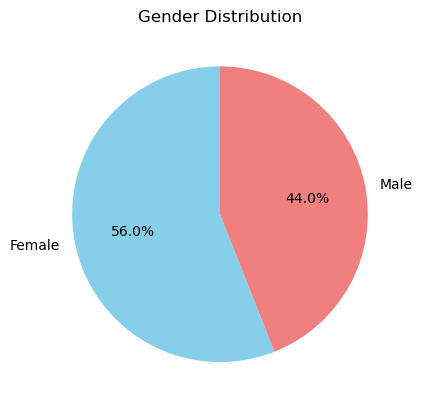

In [59]:
# Create a pie chart
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Add a title
plt.title('Gender Distribution')

# Show the plot
plt.show()

# Bivariate analysis

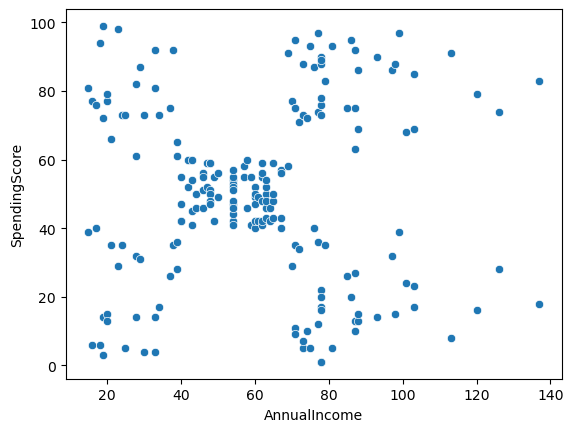

In [52]:
sns.scatterplot(data=df,x='AnnualIncome',y='SpendingScore');

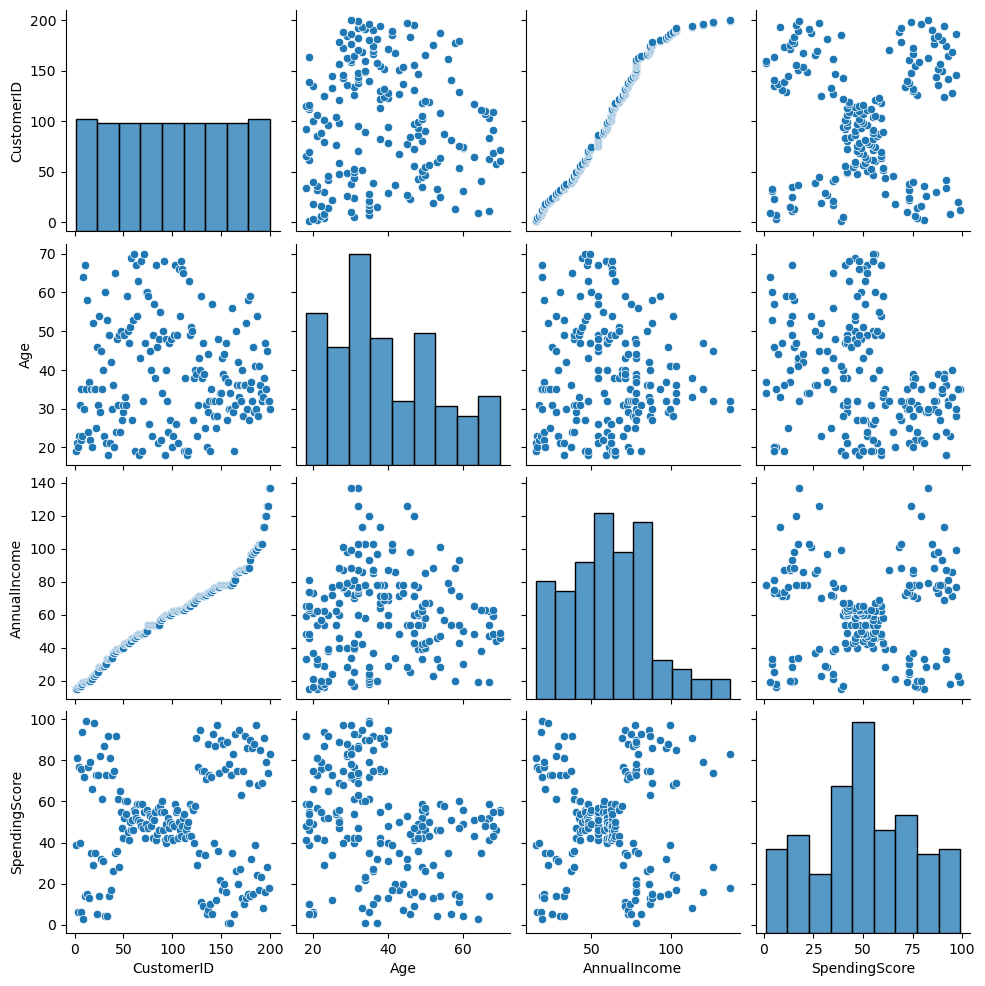

In [53]:
sns.pairplot(df)

dropping customerid from our data

In [55]:
df.drop(columns='CustomerID',inplace=True)

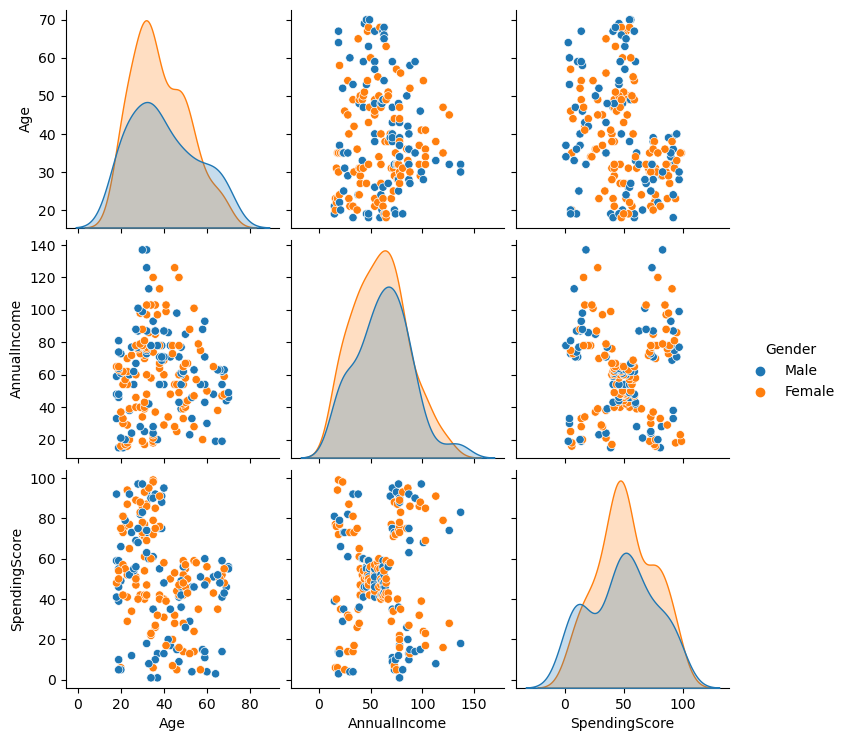

In [60]:
sns.pairplot(df,hue='Gender')

In [61]:
df.groupby(['Gender'])['Age','AnnualIncome','SpendingScore'].mean()


,Age,AnnualIncome,SpendingScore
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [62]:
df.corr()

,Age,AnnualIncome,SpendingScore
Age,1.000000,-0.012398,-0.327227
AnnualIncome,-0.012398,1.000000,0.009903
SpendingScore,-0.327227,0.009903,1.000000


<Axes: >

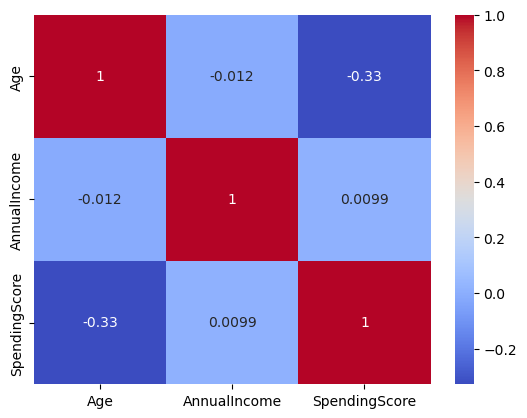

In [64]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Clustering univariate , bivaraite , multivariate

In [65]:
cluster = KMeans()

In [66]:
cluster.fit(df[['AnnualIncome']])

KMeans()

In [67]:
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4])

In [68]:
df['income cluster']= cluster.labels_
df.head()

,Gender,Age,AnnualIncome,SpendingScore,income cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [69]:
df['income cluster'].value_counts()

3    40
7    36
2    32
0    28
5    26
6    16
1    14
4     8
Name: income cluster, dtype: int64

In [73]:
gender_mapping = {'Male': 0, 'Female': 1}

# Apply the mapping to the 'Gender' column
df['Gender'] = df['Gender'].map(gender_mapping)

The "elbow" of the plot is typically a point where the rate of decrease in sum of squared distances slows down. This point is often considered a good estimate for the optimal number of clusters.

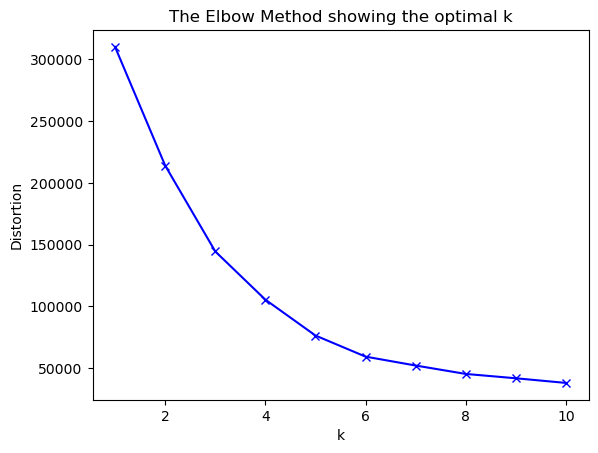

In [74]:
distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The silhouette score measures how well-defined the clusters are. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
Compute the silhouette score for different values of k and choose the one with the highest silhouette score.

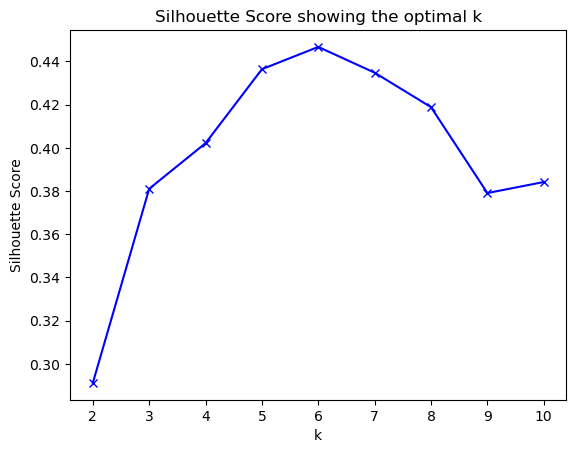

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    labels = kmeanModel.labels_
    silhouette_scores.append(silhouette_score(df, labels))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score showing the optimal k')
plt.show()

In [84]:
interia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['AnnualIncome']])
    interia_scores.append(kmeans.inertia_)
interia_scores

[137277.27999999997,
 48660.88888888889,
 23528.15217391304,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3931.988095238096,
 2822.4996947496948,
 2389.818989490042,
 1783.4240609064136]

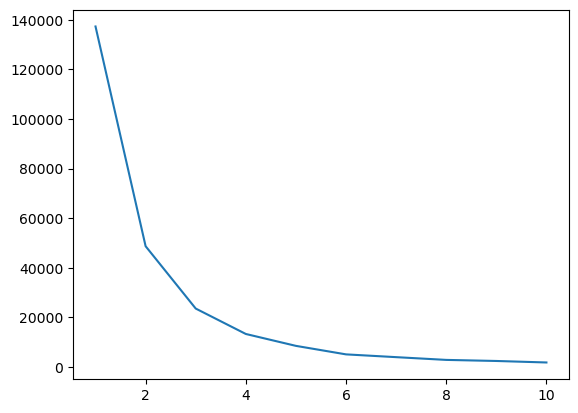

In [85]:
plt.plot(range(1,11),interia_scores)

### Implementing the K mean with the optimal number of clusters which is 6 (Univariate analysis)

In [77]:
clustering = KMeans(n_clusters=6)

In [78]:
clustering.fit(df[['AnnualIncome']])

KMeans(n_clusters=6)

In [79]:
df['incomeclusterOptimal']= clustering.labels_
df.head()

,Gender,Age,AnnualIncome,SpendingScore,income cluster,incomeclusterOptimal
0,0,19,15,39,2,0
1,0,21,15,81,2,0
2,1,20,16,6,2,0
3,1,23,16,77,2,0
4,1,31,17,40,2,0


In [80]:
df['incomeclusterOptimal'].value_counts()

5    48
2    42
1    42
0    32
3    28
4     8
Name: incomeclusterOptimal, dtype: int64

In the context of k-means clustering, the term "inertia" refers to the sum of squared distances between each data point and its assigned cluster center.

In [81]:
clustering.inertia_

5050.904761904762

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

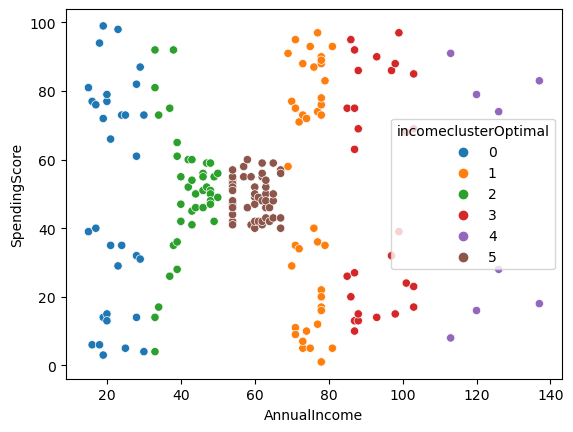

In [118]:
sns.scatterplot(data=df,x='AnnualIncome',y='SpendingScore',hue='incomeclusterOptimal',palette='tab10')

analysising what we got after applying the cluster alg

In [86]:
df.groupby('incomeclusterOptimal')['Age','AnnualIncome','SpendingScore'].mean()

,Age,AnnualIncome,SpendingScore
incomeclusterOptimal,,,
0,34.906250,22.000000,49.656250
1,35.428571,75.095238,51.095238
2,43.000000,42.238095,50.666667
3,38.214286,93.000000,50.928571
4,36.500000,124.000000,49.625000
5,41.604167,60.083333,49.041667


### bivariate clustering

In [87]:
clustering_bivariate= KMeans()
clustering_bivariate.fit(df[['AnnualIncome','SpendingScore']])
df['SpendingScore & AnnualIncome cluster'] =clustering_bivariate.labels_
df.head()

,Gender,Age,AnnualIncome,SpendingScore,income cluster,incomeclusterOptimal,SpendingScore & AnnualIncome cluster
0,0,19,15,39,2,0,3
1,0,21,15,81,2,0,2
2,1,20,16,6,2,0,3
3,1,23,16,77,2,0,2
4,1,31,17,40,2,0,3


In [88]:
df['SpendingScore & AnnualIncome cluster'].value_counts()

4    47
1    40
0    28
5    22
3    21
2    21
6    11
7    10
Name: SpendingScore & AnnualIncome cluster, dtype: int64

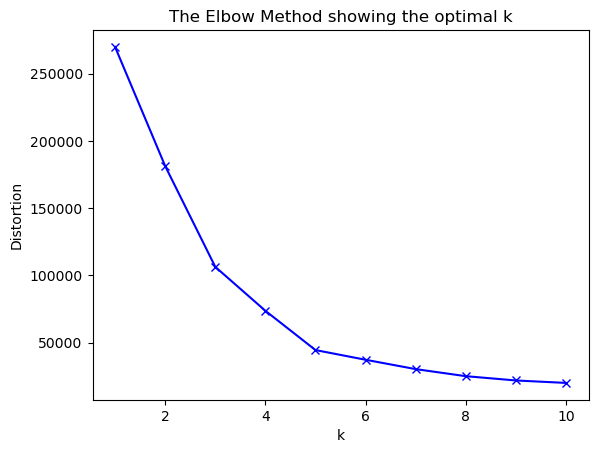

In [92]:
distortions2 = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['AnnualIncome','SpendingScore']])
    distortions2.append(kmeanModel.inertia_)

plt.plot(K, distortions2, 'bx-')  # Fix the variable name here
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

implementing the optimal number of clusters which is 5

In [113]:
clustering_bivariate2= KMeans(n_clusters=5)
clustering_bivariate2.fit(df[['AnnualIncome','SpendingScore']])
df['SpendingScore & AnnualIncome'] =clustering_bivariate2.labels_
df.head()

,Gender,Age,AnnualIncome,SpendingScore,income cluster,incomeclusterOptimal,SpendingScore & AnnualIncome cluster,SpendingScore & AnnualIncome
0,0,19,15,39,2,0,7,1
1,0,21,15,81,2,0,4,3
2,1,20,16,6,2,0,7,1
3,1,23,16,77,2,0,4,3
4,1,31,17,40,2,0,7,1


<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

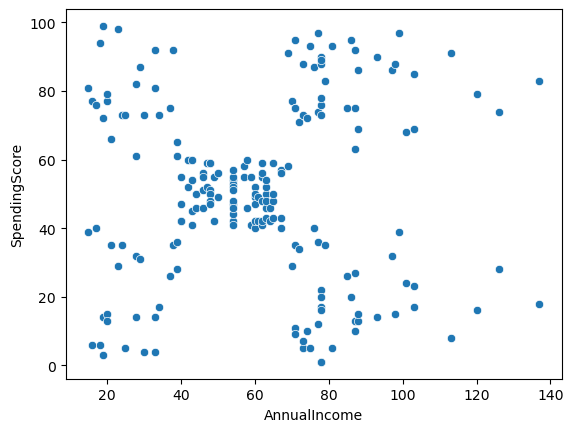

In [111]:
sns.scatterplot(data=df,x='AnnualIncome',y='SpendingScore')

In [128]:
centers =pd.DataFrame(clustering_bivariate2.cluster_centers_)
centers.columns=['X','Y']
centers

,X,Y
0,88.200000,17.114286
1,26.304348,20.913043
2,86.538462,82.128205
3,25.727273,79.363636
4,55.296296,49.518519


<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

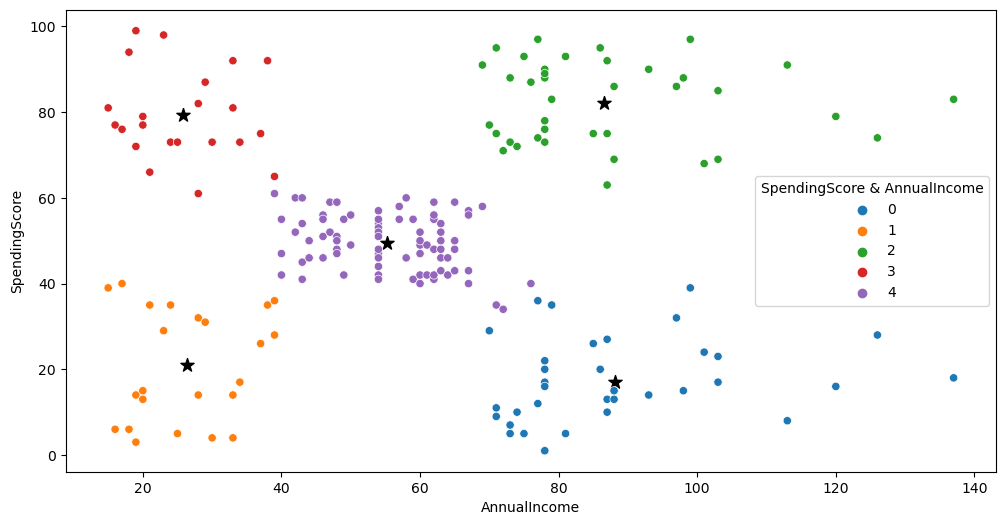

In [130]:
plt.figure(figsize=(12,6))
plt.scatter(x=centers['X'],y=centers['Y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='AnnualIncome',y='SpendingScore',hue='SpendingScore & AnnualIncome',palette='tab10')

In [133]:
pd.crosstab(df['SpendingScore & AnnualIncome'],df['Gender'],normalize='index')

Gender,0,1
SpendingScore & AnnualIncome,,
0,0.542857,0.457143
1,0.391304,0.608696
2,0.461538,0.538462
3,0.409091,0.590909
4,0.407407,0.592593


lowest age is in cluster 3 with a very low Annual income and a very high spending score

while cluster 0 with average age of 41.114286 and a very high Annual income and a very low spending score

our target cluster is cluster 2 with the average age of 32.692308 and equivalent amount of SpendingScore & AnnualIncome

In [139]:
df.groupby('SpendingScore & AnnualIncome')['Age','AnnualIncome','SpendingScore'].mean()

,Age,AnnualIncome,SpendingScore
SpendingScore & AnnualIncome,,,
0,41.114286,88.200000,17.114286
1,45.217391,26.304348,20.913043
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519
